# Problems
***

This Jupyter Notebook contains the assessment for the module of Applied Statistics taught by Ian McLoughlin. This assessment is composed by 4 problems which aim to demonstrate the skills acquired within this course.

Because the 12-cup experiment makes a perfect result by chance far less likely (0.00202 \approx 0.2\%) compared to \(0.01429 \approx 1.4\%\) in Fisher’s original 8-cup design; the extended version gives stronger evidence against the null hypothesis.

In hypothesis testing, results that are less likely under the null provide stronger evidence against it, as explained in [Statistical significance](https://en.wikipedia.org/wiki/Statistical_significance) and the overview of p-values in [Hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing).

In practical terms:

- There is no need to relax the usual significance level (e.g., $α = 0.05$), since the p-value in the 12-cup extended experiment (e.g., $p-value = 0.00202$) falls well below this threshold, as outlined in the discussion of [Significance level](https://en.wikipedia.org/wiki/Statistical_significance#Significance_level).

- The extended design is more conservative because it makes a perfect score much harder to obtain by chance. This idea aligns with how rare events are described in [Probability](https://en.wikipedia.org/wiki/Probability).

- A perfect 4/4 result is therefore much more convincing in the 12-cup version, since it is around seven times less likely under random guessing.

Overall, using more cups makes random success less plausible and strengthens the experiment’s ability to distinguish real ability from guessing.



In [66]:
# Install all required libraries

"""Numerical structures and operations.
https://numpy.org/doc/stable/reference/index.html#reference"""
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm

"""Plotting.
https://matplotlib.org/stable/contents.html"""
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

# From Python Standard Library:

"""Mathematical functions
https://docs.python.org/3/library/math.html"""
import math

"""Permutations and combinations 
https://docs.python.org/3/library/itertools.html"""
import itertools

"""Random selections
https://docs.python.org/3/library/random.html"""
import random



# import sympy as sp
# from nose import with_setup, tools
# from sklearn import datasets
# from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
# from qiskit.visualization import plot_histogram
# import yfinance as yf

## Problem 1 — Extending the Lady Tasting Tea Experiment

This problem revisits and extends R.A. Fisher’s classic [Lady Tasting Tea](https://en.wikipedia.org/wiki/Lady_tasting_tea) experiment from 1935, which is foundational in the development of modern hypothesis testing.  
We first analyse the original 8-cup design and then extend the experiment to 12 cups.  
Using Python and NumPy, we estimate the probability of perfect guessing under the null hypothesis and compare how the extended design affects statistical conclusions.

The problem is split into the following parts:
- Part A - Original 8-Cup Experiment
- Part B - Extended 12-Cup Experiment (8 tea-first, 4 milk-first)
- Part C - Simulation of the Extended Experiment
- Part D - Comparison of Original (8-cup) vs Extended (12-cup) Lady Tasting Tea Experiment
- Part E - p-value threshold discussion

### Part A - Original 8-Cup Experiment

In the original Lady Tasting Tea experiment, Fisher tested a woman's claim that she could tell whether milk or tea was poured first into a cup. She was given 8 cups (4 tea-first and 4 milk-first) in random order.   
The experiment setup was:

- Total cups: 8
- Milk-first: 4  
- Tea-first: 4 

In [67]:
# Total cups
total_cups = 8

# Milk-first cups
milk_first = 4

# Tea-first cups
tea_first = 4

This setup naturally leads to a **hypothesis test**, where we compare:

- **Null hypothesis (H₀):** The participant is guessing at random (just luck) 
- **Alternative hypothesis (H₁):** The participant has genuine ability

A null hypothesis represents the default position that there is *no real effect* or *no real ability*, and any observed result is attributed to chance.  
I learned about the formal definition of a null hypothesis from the Wikipedia page on [Statistical hypothesis test](https://en.wikipedia.org/wiki/Statistical_hypothesis_test), which explains that hypothesis tests evaluate whether data provide sufficient evidence to reject this default assumption.

Under the null hypothesis, all combinations of 4 milk-first cups among 8 are equally likely. The number of possible combinations is:

$$\binom{8}{4} = 70.$$

To complete this we will use the function `math.comb(n, k)`, which is a built-in Python function (introduced in Python 3.8) that comes from the math module. The [Python Standard Library](https://docs.python.org/3/library/math.html#math.comb) documentation regarding math.comb() was consulted to develop the work on this section. 

This function calculates how many ways to choose k elements from a set of n elements. 
Some thing to observe about this function:

- Order of the elements does not matter. 
- Each element is only selected once.

In this case n is represented in the math.comb function by the variable *total_cups* (8) and k is represented by *milk_first* (4).

In [68]:
# Number of possible combinations
comb = math.comb(total_cups, milk_first)

# Show the result
print ("The number of possible combinations is:", comb)

The number of possible combinations is: 70


Fisher calculated that the probability of correctly identifying all cups by chance was:

$$
P = \frac{1}{70} \approx 0.0142857
$$

In [69]:
# Probability of a perfect result by chance
prob = 1 / comb

# Show the result
print('Probability of of correctly identifying all cups by chance was:', prob)

Probability of of correctly identifying all cups by chance was: 0.014285714285714285


**Note:**  
The combinatorial method used here is explained in full detail in Part B (the extended experiment), so only the direct calculation is shown here to avoid unnecessary repetition.

### Part B - Extended 12-Cup Experiment (8 tea-first, 4 milk-first)

We now extend the Lady Tastign Tea experiment to 12 cups where the layout is as per below:

- Total cups: 12  
- Milk-first: 4  
- Tea-first: 8 

We're testing the same basic claim: a participant again claims to distinguish pouring order. Therefore the null hypothesis and alternative hypothesis maintain the same:
- Null hypothesis $H_0$: The participant's guesses were random (just luck)
- Alternative hypothesis $H_1$: The participant had real ability

We first define the variables of each group in order to keep track of the tea preparation options as well as the group containing all cups.

In [70]:
# Total cups
total_cups_ext = 12

# Milk-first cups
milk_first_ext = 4

# Tea-first cups
tea_first_ext = 8

We then use the function `math.comb(n, k)` again:

In [71]:
# Number of possible combinations
comb_ext = math.comb(total_cups_ext, milk_first_ext)

# Show the result
print ("The number of possible combinations in the extended experiment is:", comb_ext)

The number of possible combinations in the extended experiment is: 495


Then, calculate the probability of the extended combination:

$$
P = \frac{1}{495} \approx 0.00202
$$

This follows directly from the definition of probability for equally likely outcomes (see the discussion of classical probability in [Wikipedia: Probability](https://en.wikipedia.org/wiki/Probability)).  

Thus, in the extended 12-cup experiment, the chance of the participant guesses a perfect result by luck alone is **1 chance in 495 possible combinations** or just **0.202%**, making the design substantially more stringent than Fisher’s original test.

In [72]:
# Probability of a perfect result by chance for the extended experiment
prob_ext = 1 / comb_ext

# Show the result
print(f'Probability of of correctly identifying all cups by chance in the extended experiment was:', prob_ext)

Probability of of correctly identifying all cups by chance in the extended experiment was: 0.00202020202020202


#### Understanding the combinatorial calculation

Behind the scenes, the `math.comb()` function calculates the number of ways to choose \( k \) items from a set of \( n \) items (without regard to order), which is given by the **binomial coefficient**:

$$\binom{n}{k}$$

This binomial coefficient is defined mathematically by the factorial formula:

$$\binom{n}{k} = \frac{n!}{k! \times (n - k)!}
$$

To connect Python’s `math.comb()` function to this mathematical formula, I consulted the [Python Standard Library documentation](https://docs.python.org/3/library/math.html#math.comb) and the article on [Binomial coefficients](https://en.wikipedia.org/wiki/Binomial_coefficient).  
Reading both sources makes it clear that math.comb(n, k) computes this exact expression.

**Interpretation of the factorial components:**

To represent factorial in Python we will use math.factorial() function to calculate the factorial of each component of the factorial formula, which generates the product of a (n) positive integer and all the integers below it. For instance, for n = 12 we calculate (12 x 11 x 10 x ... x 1). To use this function, I consulted [math.factorial(n)](https://docs.python.org/3/library/math.html#math.factorial) in Python Standard Library.

- **n!** counts the number of ways to fully arrange all \( n \) items.  
  In this experiment, \( n = 12 \), representing all cups.  


In [73]:
# n!
n_fact= math.factorial(total_cups_ext)

# Display n!
n_fact

479001600

- **k!** counts the number of internal arrangements of the selected \( k \) items  
  (here, \( k = 4 \) milk-first cups). These internal permutations must be divided out  
  because the order of selection does not matter.

In [74]:
# k!
k_fact = math.factorial(milk_first_ext)

# Display k!
k_fact

24

- **(n - k)!** counts how many internal arrangements exist among the non-selected items  
  (here, the 8 tea-first cups). These are also divided out for the same reason.

In [75]:
# (n-k)!
n_minus_k_fact = math.factorial(total_cups_ext - milk_first_ext)

# Display (n-k)!
n_minus_k_fact

40320

- Replacing the values in the formula we have:

  - **n!** = 479001600 
  - **k!** = 24 
  - **(n-k)!** = 40320 

In [76]:
# Total combinations using the formula n! / (k! * (n-k)!)
fact_combin = n_fact // (k_fact * n_minus_k_fact)

# Display total combinations
fact_combin

495

**Substituting values for the extended experiment ( n = 12, k = 4 ) in the factorial formula would look like:**

$$
\binom{12}{4}
= \frac{12!}{4! \times 8!}
= \frac{479{,}001{,}600}{24 \times 40{,}320}
= 495.
$$

Thus, there are 495 distinct ways to assign the 4 milk-first cups among 12 cups, and this matches the output of `math.comb(12, 4)` in Python.

In [77]:
# Confirming both methods give the same result
comb_ext == fact_combin

True

### Part C - Simulation of the Extended Experiment

To estimate the probability of correctly identifying all cups under random guessing, we perform a Monte-Carlo simulation using NumPy.

A Monte Carlo simulation estimates probabilities by repeating a random process many times and observing how often an outcome occurs. Instead of calculating a probability purely by formula, we approximate it through large numbers of simulated trials. This technique is widely used when randomness is part of the problem or when we want to validate a theoretical result. This knowledge was acquired by consulting the page in Wikipedia which explains [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method).

NumPy is used in this simulation and provides efficient tools for generating random samples and performing array-based computations. It is also used to simulate random combinations and calculate overlaps quickly across a large number of trials. NumPy’s vectorised operations are significantly faster than pure Python loops, making it well suited for large-scale Monte Carlo simulations. The behaviour of these functions was understood from the description in the NumPy documentation: https://numpy.org/doc/stable/reference/random/index.html.

Here, we are going to breakdown this section under the following items:
1. Pre-simulation setup
2. Simulation trials (Monte Carlo loop)
3. Probabilities
4. Visualisation

#### 1. Pre-simulation setup

Before running the simulation, we set a fixed random seed for reproducibility, define the number of Monte Carlo trials, and create an array to store how often each possible outcome occurs. This prepares the environment so the simulation results can be recorded consistently.

We fix the random seed to make the results reproducible (same random numbers every time the notebook is run), which is important when verifying or reviewing statistical simulations.

In [78]:
# Reproducibility
np.random.seed(0)

Then, we determine the number of trials to run and create an array of zeros to record the outcomes. More trials give a more accurate estimate, and the array tracks how often each number of correct guesses occurs.
In our case, milk_first_ext = 4, then np.zeros(4+1) creates an array with 5 positions: [0, 0, 0, 0, 0].

In [79]:
# Simulation parameters:

# Number of Monte Carlo repetitions
trials = 500000

# Create an array of zeros to store how often each possible outcome occurs
counts = np.zeros(milk_first_ext + 1, dtype=int)

# Display the counts array
print("Counts array created:", counts)

Counts array created: [0 0 0 0 0]


Each index represents:
- index 0 → trials with 0 correct.
- index 1 → trials with 1 correct.
- index 2 → trials with 2 correct.
- index 3 → trials with 3 correct.
- index 4 → trials with 4 correct.  

As the simulation runs, the system updates these counts.   
We define *dtype=int* because the counts array is meant to store whole numbers (0, 1, 2, 3, …) counts rather than the default floating-point numbers. Each element of the array keeps track of how many trials fell into a particular outcome category, and counts can only be integers.  
Documentation was consulted on [np.zeros()](https://numpy.org/devdocs//reference/generated/numpy.zeros.html) to use in this notebook.

#### 2. Simulation Trials (Monte Carlo loop)

In each Monte Carlo trial, two random selections are made using `numpy.random.choice()`.  
The first selection *true_milk* represents the cups that actually have milk poured first, and the second *guessed_milk* represents the participant’s random guesses.  
Both selections use *replace=False* to ensure that the same cup is not chosen twice, mirroring the real experiment where each cup is unique.

To determine how many guesses are correct, the code uses `numpy.intersect1d()`, which returns the sorted intersection of the two arrays.  
The length of this intersection gives the number of correctly identified cups.

Finally, the corresponding position in the *counts* array is incremented, recording how many trials resulted in that number of correct guesses.

In summary, each trial:
- Randomly selects which cups *actually* have milk first.  
- Randomly guesses which cups the participant *claims* have milk first.  
- Counts the overlap (correct guesses).  
- Records the result.

The NumPy documentation for functions such as [numpy.random.choice()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) and [numpy.intersect1d()](https://numpy.org/doc/stable/reference/generated/numpy.intersect1d.html) were reviewed to apply these in this notebook and allow us to simulate random assignments and calculate overlaps quickly across a large number of trials.

In [80]:
for i in range(trials):
    # Actually have milk-first cups (ground truth)
    true_milk = np.random.choice(total_cups_ext, size=milk_first_ext, replace=False)
    
    # Random guesses
    guessed_milk = np.random.choice(total_cups_ext, size=milk_first_ext, replace=False)
    
    # Number of correct guesses (intersection)
    correct = len(np.intersect1d(true_milk, guessed_milk))
    
    counts[correct] += 1

# Display the raw frequency of outcomes
for k, c in enumerate(counts):
    print(f"{k} correct guesses: {c:,} times")

0 correct guesses: 70,853 times
1 correct guesses: 226,525 times
2 correct guesses: 169,221 times
3 correct guesses: 32,398 times
4 correct guesses: 1,003 times


#### 3. Probabilities

After the simulation loop, the raw counts are converted into probabilities by dividing each count by the total number of trials. This gives the estimated probability of obtaining 0, 1, 2, 3, or 4 correct guesses under random guessing. The printed output summarises these estimated probabilities before they are visualised in the plot.

In [81]:
# Convert counts to probabilities
simulated_probabilities = counts / trials

# Display the estimated probabilities
print("Simulation results (Extended 12-cup experiment):")
for k, p in enumerate(simulated_probabilities):
    print(f"Probability of {k} correct guess(es): {p:.4f}")

Simulation results (Extended 12-cup experiment):
Probability of 0 correct guess(es): 0.1417
Probability of 1 correct guess(es): 0.4531
Probability of 2 correct guess(es): 0.3384
Probability of 3 correct guess(es): 0.0648
Probability of 4 correct guess(es): 0.0020


The simulation closely matches the theoretical probability:

- Probability of 4 guesses were the 4 correct cups of milk first ≈ 0.0020  
- This matches $( 1 / 495 )$, confirming the analytical result.

The distribution shows that:

- 1–2 correct guesses occur most often under random guessing  
- 3 correct is uncommon  
- 4 correct is extremely unlikely  

#### 4. Visualisation

The bar chart below visualises the estimated probability of obtaining 0, 1, 2, 3, or 4 correct guesses in the extended experiment. Each bar represents one outcome, and a label is added above each bar to display its exact probability. This provides a clear, intuitive summary of the distribution produced by the Monte Carlo simulation. The documentation on [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) was examined to develop the plot below.

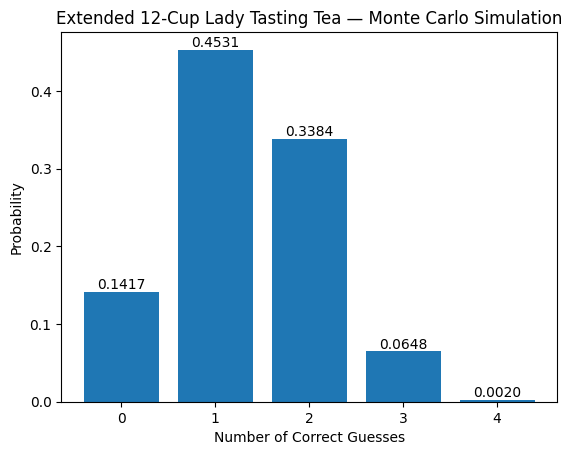

In [82]:
# Create a bar chart of the simulated probabilities
bars = plt.bar(range(len(simulated_probabilities)), simulated_probabilities)

# Label the axes
plt.xlabel("Number of Correct Guesses")
plt.ylabel("Probability")

# Add a title to the plot
plt.title("Extended 12-Cup Lady Tasting Tea — Monte Carlo Simulation")

# Annotate each bar with its probability value (formatted to 4 decimals)
for bar in bars:
    height = bar.get_height()  # Height = probability
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of the bar)
        height,                              # y-position (top of the bar)
        f"{height:.4f}",                      # Text label
        ha="center", va="bottom"              # Center horizontally, place text just above bar
    )

# Display the plot
plt.show()

### Part D - Comparison of Original (8-cup) vs Extended (12-cup) Lady Tasting Tea Experiment

| Experiment | Combinations | P(all correct) |
|-----------|--------------|----------------|
| Fisher 8-cup | 70 | 0.01429 |
| Extended 12-cup | 495 | 0.00202 |

**Interpretation:**

The extended design is **far more stringent**.  
A perfect score is:

- ~7 × less likely under random guessing  
- Therefore, stronger evidence against the null hypothesis

Increasing the number of cups strengthens discrimination between genuine ability and luck.


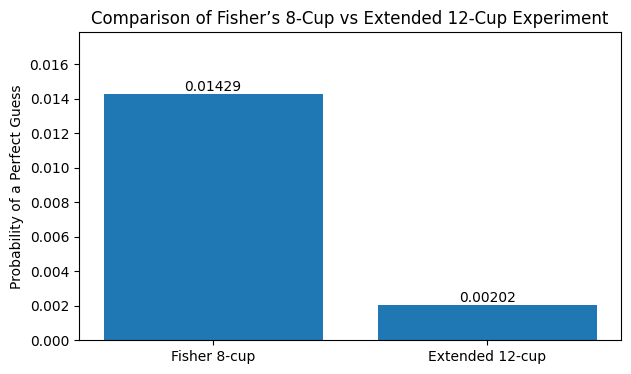

In [83]:
# Data
experiments = ["Fisher 8-cup", "Extended 12-cup"]
probabilities = [prob, prob_ext]

# Create the bar chart
plt.figure(figsize=(7, 4))

# Let Matplotlib assign different colours automatically
bars = plt.bar(experiments, probabilities)

# Labels and title
plt.ylabel("Probability of a Perfect Guess")
plt.title("Comparison of Fisher’s 8-Cup vs Extended 12-Cup Experiment")

# Add numeric probability labels on top of each bar
for bar, probab in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position (center of the bar)
        height,                               # y-position (top of the bar)
        f"{probab:.5f}",                         # formatted probability
        ha="center", va="bottom"
    )

# Slightly expand y-axis for visual spacing
plt.ylim(0, max(probabilities) * 1.25)

# Display the chart
plt.show()

### Part E - p-value threshold discussion

### Conclusion of the Extended Lady Tasting Tea Experiment

This investigation combined analytical combinatorics, theoretical probability, and Monte Carlo simulation to extend and explore Fisher’s classic “Lady Tasting Tea” experiment. By increasing the number of cups from 8 to 12, the probability of achieving a perfect result under random guessing drops from \(1/70\) (about 1.4%) to \(1/495\) (about 0.2%). This seven-fold decrease makes the extended design far more stringent and provides stronger evidence against the null hypothesis when a perfect outcome is observed.

The notebook demonstrated how the binomial coefficient formally quantifies the number of possible cup arrangements, and how these analytical results align closely with the probabilities estimated from a large-scale NumPy-based Monte Carlo simulation. The agreement between the theoretical and simulated probabilities reinforces the reliability of both approaches.

Overall, the extended experiment improves the discriminatory power of the test by making random success much less plausible. This highlights how changes in experimental design can strengthen statistical inference, and shows the value of simulation as a tool for validating and deepening understanding of classical statistical results.

## Problem 2: Normal Distribution

In this problem, we create 100,000 small samples of size 10 from the standard normal distribution and, for each one, we calculate two versions of standard deviation: the population version (ddof = 0) and the sample version (ddof = 1). We use NumPy to generate the random numbers and to compute both types of standard deviation.

To compare the results, we plot both sets of values on the same histogram with transparency using Matplotlib, which makes it easier to see how the two estimators behave side-by-side. Finally, we describe the differences we observe and discuss how these differences would change with a larger sample size, especially in terms of how close the estimates get to the true value.

### 1. Generating the Samples

The standard normal distribution is a special case of the normal distribution with mean μ = 0 and standard deviation σ = 1. It is defined by the probability density function:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} 
e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

This formula defines:
- μ: the mean of the distribution
- σ: the standard deviation
- A symmetric bell-shaped curve centered at μ

Source: [Standard Normal Distribution from Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution).

To simulate observations from this distribution, we use numpy.random.normal(), which generates random numbers drawn from a Gaussian distribution. Documentation on [numpy.random.normal](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html#rf578abb8fba2-2) was consulted.  
Its parameters:
- loc → mean μ
- scale → standard deviation σ
- size → shape of the output array

Because the standard normal has μ = 0 and σ = 1, we can rely on NumPy’s default values (loc=0.0, scale=1.0).

We set size = (100000, 10). This creates 100,000 independent samples, each containing 10 observations from the standard normal distribution. In orther words, think of it as 100,000 little groups and each of those groups has 10 numbers inside it.

We use np.random.seed() to ensure the results are identical every time the notebook is run.See documentation on function [numpy.random.seed()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) used here.

In [84]:
# Reproducibility
np.random.seed(123)

# Generate a random normal distribution of 100,000 samples, each of size 10
samples = np.random.normal(size=(100000, 10))

# show
samples


array([[-1.0856306 ,  0.99734545,  0.2829785 , ..., -0.42891263,
         1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897,  1.49138963, ...,  2.18678609,
         1.0040539 ,  0.3861864 ],
       [ 0.73736858,  1.49073203, -0.93583387, ..., -1.4286807 ,
        -0.14006872, -0.8617549 ],
       ...,
       [ 0.17762368,  0.96536248,  0.62452249, ..., -1.7925049 ,
         0.48963897,  0.09439754],
       [-1.40901101,  1.10358968, -0.02636738, ..., -2.62869442,
         1.43692647,  1.60489988],
       [ 1.31148997, -0.00724761, -0.89857677, ..., -0.84768045,
        -0.73819061, -1.29277267]])

### 2. Computing Standard Deviations for Each Sample

Standard deviation is a numerical measure that quantifies how far individual observations typically deviate from the mean of a dataset. The formal definition of standard deviation can be expressed differently depending on whether we are working with a full population or a sample.
(Source consulted: Wikipedia [Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation))

#### 2.1 Population vs. Sample Standard Deviation


Statistically, we distinguish between two contexts:   

(A) Population Standard Deviation.  

If we have every value in an entire population (no uncertainty, no missing data), the standard deviation is defined as:


$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

Here:

* the greek letter $\sigma$ is the standard deviation of the population
* $\mu$ is the true population mean
* N is the population size

Because the true mean is known, this formula relies on complete information and measures the exact variability of the population.  
However, this formula underestimates variability when applied to a sample, because samples generally do not contain the full information about the population.

(B) Sample Standard Deviation.

In most practical settings, we work with a sample drawn from a larger population. Since the true population mean $(μ)$ is unknown, we estimate it using the sample mean $(\bar{x})$.
Estimating the mean introduces systematic bias in the variability estimate, so the denominator is adjusted to $N−1$:

$$
s = \sqrt{\frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

This adjustment is called [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction), and it makes the sample standard deviation an unbiased estimator of the population standard deviation.   

Note that the sample standard deviation is represented by the letter $(s)$. 

#### 2.2 Standard Deviation in NumPy

In NumPy, the function numpy.std() is used to compute the standard deviation.   
A brief description of the most relevant arguments of numpy.std(a, axis, ddof) is detailed below and was retrieved from [NumPy Documentation on function sdt()](https://numpy.org/doc/stable/reference/generated/numpy.std.html):
- `a`: an array-like object containing the data
- `axis`: specifies whether to compute the statistic across rows, columns, or the entire array
- `ddof`: controls the denominator of the standard deviation formula

In numpy the key difference between population standard deviation and sample standard deviation lies in what denominator we use.

NumPy implements the following formula for standard deviation:

$$
\text{SD} = \sqrt{\frac{1}{N - \text{ddof}}
\sum_{i=1}^{N} (a_i - \bar{a})^2 }
$$

Note that:
- `ddof` stands for Delta Degree of Freedom
- we use `SD` to represent standard deviation for the population $(\sigma)$ or sample $(s)$.
- we also use $\bar{a}$ to represent the mean for the population $(\mu)$ or sample $(\bar{x})$.

See the values for `ddof` and their representation:

* `ddof = 0` → denominator = ( N ) → **population SD**
* `ddof = 1` → denominator = ( N - 1 ) → **sample SD**

In other words:

| Purpose                                  | Correct `ddof` | Formula                                         |
| ---------------------------------------- | -------------- | ----------------------------------------------- |
| **Population standard deviation**        | `ddof=0`       | $\sqrt{\frac{1}{N}} \sum_{i=1}^{N} (x_i - \bar{x})^2$    |
| **Sample standard deviation (unbiased)** | `ddof=1`       | $\sqrt{\frac{1}{N-1}} \sum_{i=1}^{N} (x_i - \bar{x})^2$  |

#### 2.3 Population Standard Deviation (ddof = 0)

Let's compute NumPy Population Standard Deviation:


$$\sigma = \sqrt{\frac{1}{N - \text{(0)}} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

In [85]:
# Population SD (biased estimator)
sd_population = np.std(samples, axis=1, ddof=0)

# Show
sd_population

array([1.2363048 , 1.08673631, 1.02663711, ..., 0.73735415, 1.27480498,
       1.03174138])

NumPy is taking each of the 100,000 small groups of 10 in samples and calculating how spread out the numbers are inside each group. Because axis=1 is used, the standard deviation is computed row by row, giving one value per group. The output is therefore a long list of 100,000 standard deviation values, one for each group of 10 numbers.
Here, NumPy uses the population formula, which divides by the full number of values in each group. This tends to produce slightly smaller values, because it does not adjust for the fact that we are working with samples rather than the whole population. As a result, this version often underestimates the true amount of variation in the data.

#### 2.4 Sample Standard Deviation (ddof = 1)

Let's compute NumPy Sample Standard Deviation:

$$
s = \sqrt{\frac{1}{N - \text{(1)}} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

In [86]:
# Sample SD (unbiased estimator)
sd_sample = np.std(samples, axis=1, ddof=1)

# Show
sd_sample

array([1.30317968, 1.14552066, 1.08217053, ..., 0.77723952, 1.34376243,
       1.0875509 ])

In the same way as done before for the population standard deviation, NumPy looks at each group of 10 numbers in samples and measures how spread out they are. Using axis=1 makes it calculate this for each row separately, so the result is 100,000 standard deviation values-one for each group.
However, differently from the population standard deviation, NumPy uses the sample formula, which divides by one less than the number of values in each group. This makes each result slightly larger on average, because it adjusts for the uncertainty that comes from estimating the mean from only 10 numbers. This version gives a more accurate estimate of variation when we only have samples.

### 3. Visualisation Using Overlapping Histograms

In this section we create a plot that compares how two different formulas for standard deviation behave when we repeatedly take samples. It draws two histograms on the same figure: one for the standard deviation calculated with ddof=0 (the population formula) and one with ddof=1 (the sample formula). By plotting them together, we can see how often different values of the standard deviation show up across many repeated samples.  

Both histograms are normalized so they show densities, which means the shape reflects how the estimates are spread out, not how many values there are. The transparency allows the two shapes to overlap, so we can visually compare them more easily. Labels, a title, a legend, and a grid are added to make the plot clear and readable.    

Overall, this visualization gives us a quick way to see the difference between the two estimators: how they vary, how spread out they are, and whether one tends to produce slightly smaller or larger values than the other when sample size is small.

The main functions used here come from Matplotlib, which is a Python library for plotting graphs. [Matplotlib documentation](https://matplotlib.org/stable/api/pyplot_summary.html) was used to create the plot below. The function plt.figure() sets up the plotting area, and plt.hist() is used to draw histograms of the two sets of standard deviation values. The density=True option makes the histograms show probability densities rather than raw counts, and the alpha parameter controls transparency so they can overlap without hiding each other. Finally, functions like plt.title(), plt.xlabel(), plt.ylabel(), plt.legend(), and plt.grid() are simply for formatting the graph so it’s easier to read.

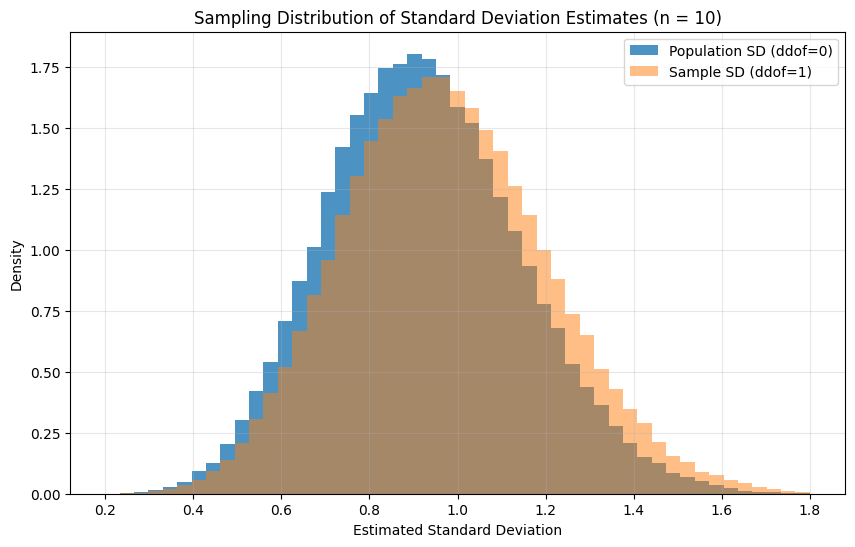

In [92]:
# Plotting both distributions
plt.figure(figsize=(10,6))

# Creating overlapping histograms
plt.hist(sd_population, bins=np.linspace(0.2, 1.8, 50), alpha=0.8, density=True, label='Population SD (ddof=0)')
plt.hist(sd_sample, bins=np.linspace(0.2, 1.8, 50), alpha=0.5, density=True, label='Sample SD (ddof=1)')

# Labels and title
plt.title("Sampling Distribution of Standard Deviation Estimates (n = 10)")
plt.xlabel("Estimated Standard Deviation")
plt.ylabel("Density")
# Legend and Grid
plt.legend()
plt.grid(alpha=0.3)
# Display the plot
plt.show()


### 4. Interpretation of the Histograms

The two histograms show that both estimators produce smooth, slightly right-skewed distributions. This shape is expected because standard deviation values cannot be negative and are based on squared deviations, which naturally create a right-tailed spread even when the underlying data are normally distributed.

The main difference is that the ddof = 0 distribution (population standard deviation) is centred lower than the ddof = 1 distribution (sample standard deviation). This reflects how the population formula systematically underestimates variability when applied to small samples. In contrast, the ddof = 1 estimator uses Bessel’s correction, which adjusts for the information lost when using the sample mean instead of the population mean. As a result, its distribution sits closer to the true value of 1, providing a less biased estimate for sample-based inference.

### 5. Effect of Increasing Sample Size

If the sample size were increased, both distributions would become narrower and more concentrated around the true population standard deviation. Larger samples reduce the influence of random fluctuations, producing more stable and less variable estimates. In addition, the difference between the ddof = 0 and ddof = 1 estimators would diminish as sample size grows, because the corrective factor used in the ddof = 1 formula approaches 1 for large n. Consequently, both estimators converge toward the same value and become nearly indistinguishable. This reflects the general principle that estimator accuracy improves with larger samples, and bias becomes negligible as more information about the population is incorporated into each sample.

### Conclusion

In this exercise, we generated many small samples from the standard normal distribution and used NumPy to compute both the population and sample standard deviation for each one. By plotting them with Matplotlib, we saw that the population SD (ddof=0) tends to be lower because it underestimates variability, while the sample SD (ddof=1) is slightly higher and gives a more accurate estimate.

The histograms showed clear differences between the two estimators when sample size is small. However, if we increased the sample size, both results would become more concentrated around the true value and the difference between them would become much smaller.

Overall, the simulation and plots helped visualize how sample size affects bias and accuracy in standard deviation estimates.

## Problem 3: t-Tests

## Problem 4: ANOVA

***
# End